## Подключение модулей

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Загрузка данных

In [10]:
star = pd.read_csv("Stars.csv")

Делаем выборку из 10 показателей

In [19]:
star.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,16.98,0,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,17.22,0,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,17.40,0,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,17.45,0,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,16.05,0,Brown Dwarf,Red,M


## Описание данных
Temperature - температура \
Luminosity - яркость \
Radius - радиус \
Absolute magnitude - абсолютная величина \
Star type - тип звезды \
Star category - к какой категории звезда относится \
Star color - цвет звезды \
Spectral Class - спектральный класс 

## Стадии решения задачи
- подключение модулей
- загрузка данных 
- разведочный анализ данных 
- предварительная обработка данных 
- обучение моделей 
- прогнозирование 

## Проверка на пустые или анамальниые значения

In [32]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [34]:
star.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,NaN,NaN,NaN,10497.4625,9552.425037,1939.0,3344.25,5776.0,15055.5,40000.0
Luminosity (L/Lo),240.0,NaN,NaN,NaN,107188.361635,179432.24494,0.00008,0.000865,0.0705,198050.0,849420.0
Radius (R/Ro),240.0,NaN,NaN,NaN,237.157781,517.155763,0.0084,0.10275,0.7625,42.75,1948.5
Absolute magnitude (Mv),240.0,NaN,NaN,NaN,4.382396,10.532512,-11.92,-6.2325,8.313,13.6975,20.06
Star type,240.0,NaN,NaN,NaN,2.5,1.711394,0.0,1.0,2.5,4.0,5.0
Star category,240,6,Brown Dwarf,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star color,240,19,Red,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spectral Class,240,7,M,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
star.max()

Temperature (K)                  40000
Luminosity (L/Lo)             849420.0
Radius (R/Ro)                   1948.5
Absolute magnitude (Mv)          20.06
Star type                            5
Star category              White Dwarf
Star color                   yellowish
Spectral Class                       O
dtype: object

In [40]:
star.min()

Temperature (K)                   1939
Luminosity (L/Lo)              0.00008
Radius (R/Ro)                   0.0084
Absolute magnitude (Mv)         -11.92
Star type                            0
Star category              Brown Dwarf
Star color                        Blue
Spectral Class                       A
dtype: object

[тык](https://imgur.com/a/mcyaPYL)

Значит у нас в дата сете нету пустых и аномальных хначений

## Разведочный анализ данных (РАД, EDA)

In [48]:
# кол-во строк и столбцов
star.shape

(240, 8)

In [50]:
# вывод типов данных 
star.dtypes

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object

In [52]:
# проверка на количество пропусков в колонках датасета
for col in star.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, star[col].isna().sum()))

Кол-во пропусков в колонке Temperature (K) = 0
Кол-во пропусков в колонке Luminosity (L/Lo) = 0
Кол-во пропусков в колонке Radius (R/Ro) = 0
Кол-во пропусков в колонке Absolute magnitude (Mv) = 0
Кол-во пропусков в колонке Star type = 0
Кол-во пропусков в колонке Star category = 0
Кол-во пропусков в колонке Star color = 0
Кол-во пропусков в колонке Spectral Class = 0


In [56]:
# количество уникальных значений каждой колонки
star.nunique()

Temperature (K)            228
Luminosity (L/Lo)          208
Radius (R/Ro)              216
Absolute magnitude (Mv)    228
Star type                    6
Star category                6
Star color                  19
Spectral Class               7
dtype: int64

Рассмотрим "Spectral Class" по подробнее.

"Spectral Class" - это классификация делищая звезды по размерам [тык](https://imgur.com/a/scAelr4)



In [60]:
# описательная статистика для всех (числовых) признаков
star.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity (L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius (R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude (Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


## Визуальный анализ

<Axes: xlabel='Star type'>

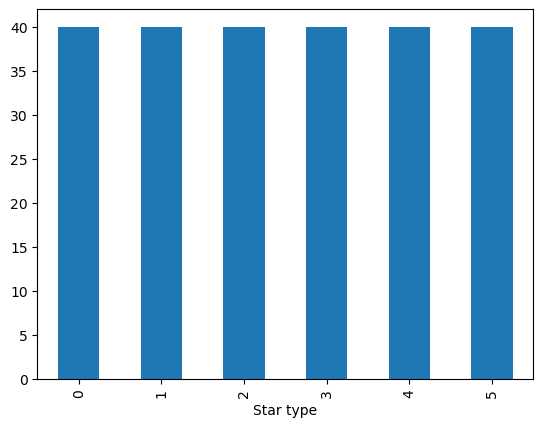

In [77]:
# рспределение типов планет в дата сете
star['Star type'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

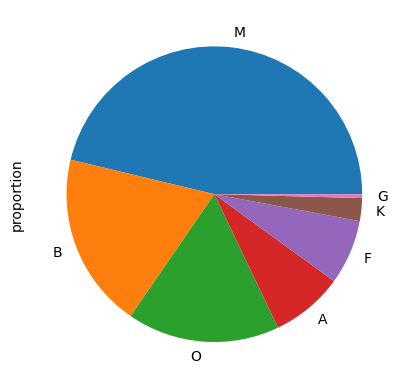

In [79]:
# отношение размерности планет на их кол-во
star['Spectral Class'].value_counts(normalize=True).plot.pie()

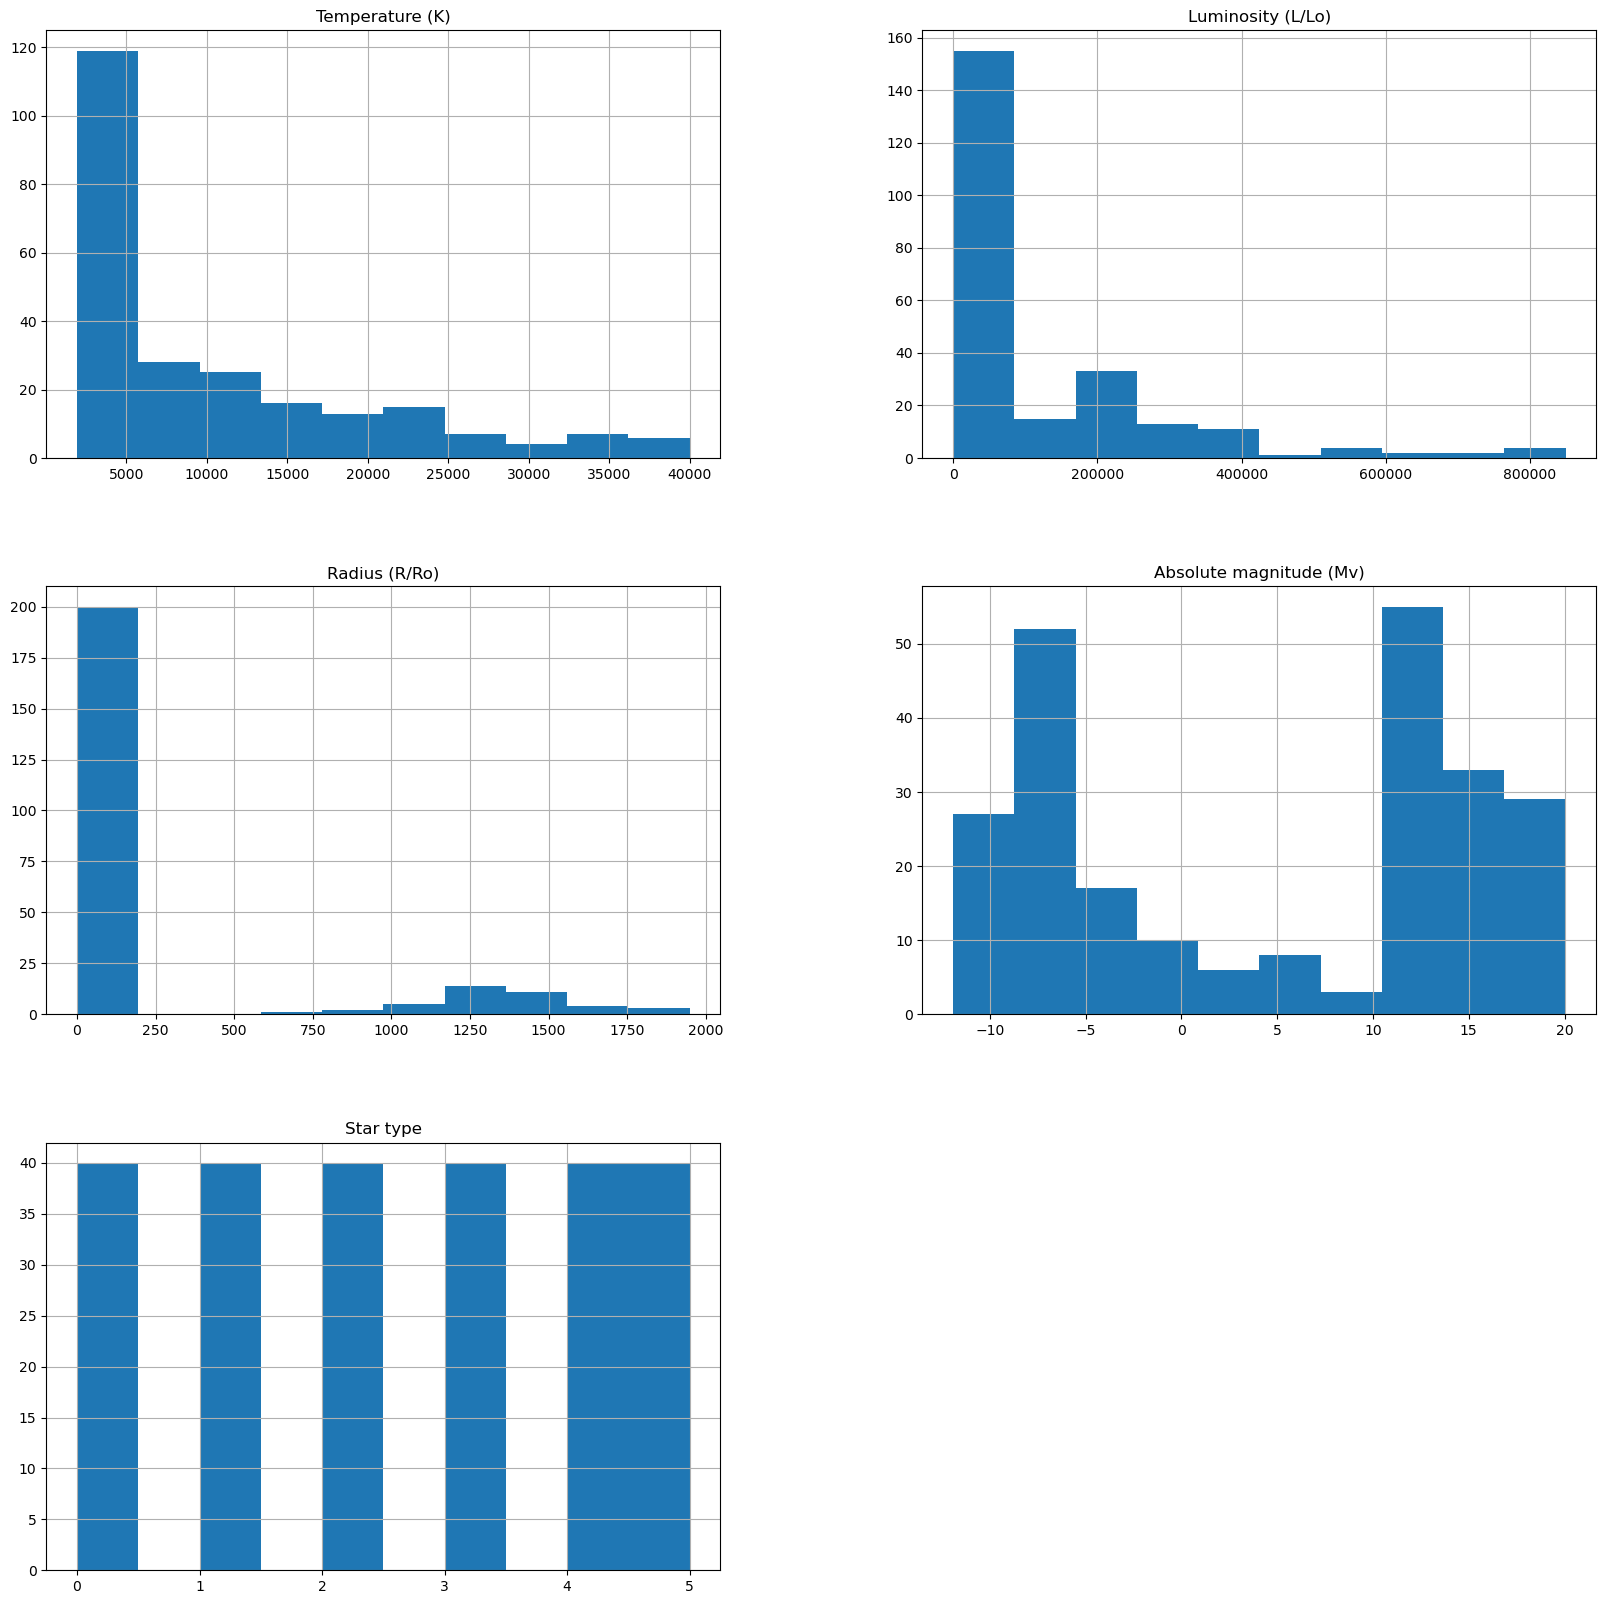

In [81]:
# гистаграммы всех признаков
star.hist(figsize=(20,20));

<Axes: ylabel='Absolute magnitude (Mv)'>

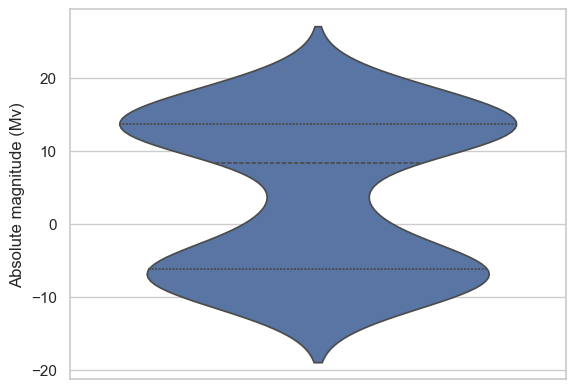

In [108]:
# строю violin plot для просмотра распределения светлости звезд
sns.violinplot(y=star["Absolute magnitude (Mv)"], inner="quartile")

## Двумерный анализ признаков

In [173]:
staars = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color', 
                  'Spectral Class']

In [147]:
# преобразуем буквенные значения в численные
spectral_class_mapping = {
    'O': 1,
    'B': 2,
    'A': 3,
    'F': 4,
    'G': 5,
    'K': 6,
    'M': 7
}


star['Spectral Class'] = star['Spectral Class'].map(spectral_class_mapping)

In [135]:
# преобразуем буквенные значения в численные
spectral_class_mapping = {
    'Brown Dwarf': 1,
    'Red Dwarf': 2,
    'White Dwarf': 3,
    'Main Sequenc': 4,
    'Supergiant': 5,
    'Hypergiant': 6,
    
}


star['Star category'] = star['Star category'].map(spectral_class_mapping)

In [141]:
# преобразуем буквенные значения в численные
spectral_class_mapping = {
    'Red': 1,
    'Blue': 2,
    'Blue-white': 3,
    'Blue White': 3,
    'yellow-white': 4,
    'White': 5,
    'Blue white': 3,
    'Yellowish White': 6,
    'white': 5,
    'Whitish': 7,
    'Orange': 8,
    'yellowish': 9,
    'Pale yellow orange': 10,
    'White-Yellow': 4,
    'Blue': 2,
    'Yellowish': 9,
    'Orange-Red': 11,
    'Blue white': 3,
    'Blue-White': 3,
    
    
    
}


star['Star color'] = star['Star color'].map(spectral_class_mapping)

In [149]:
star.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class,Spectral Class Int
0,3068,0.002400,0.1700,16.12,0,1.0,1.0,7,7
1,3042,0.000500,0.1542,16.60,0,1.0,1.0,7,7
2,2600,0.000300,0.1020,18.70,0,1.0,1.0,7,7
3,2800,0.000200,0.1600,16.65,0,1.0,1.0,7,7
4,1939,0.000138,0.1030,20.06,0,1.0,1.0,7,7


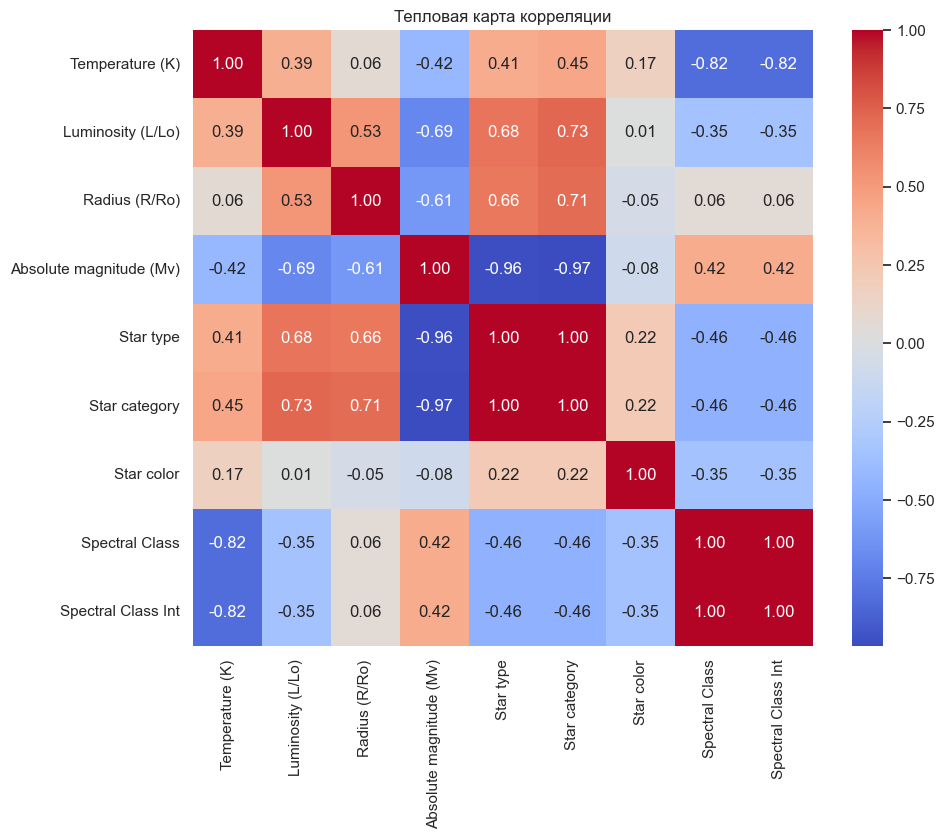

In [151]:
# создаем хитмап отнощений всех ко всем
plt.figure(figsize=(10, 8))
sns.heatmap(star.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

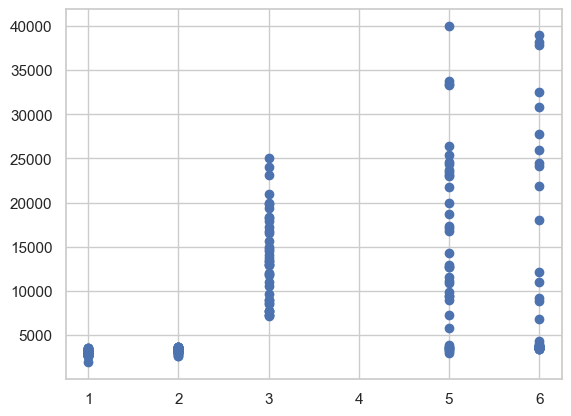

In [167]:
# строим скатер для выявления отношения размера звезды к ее размерам
plt.scatter(star['Star category'], star['Temperature (K)'])

Чем больше планета тем она жарче

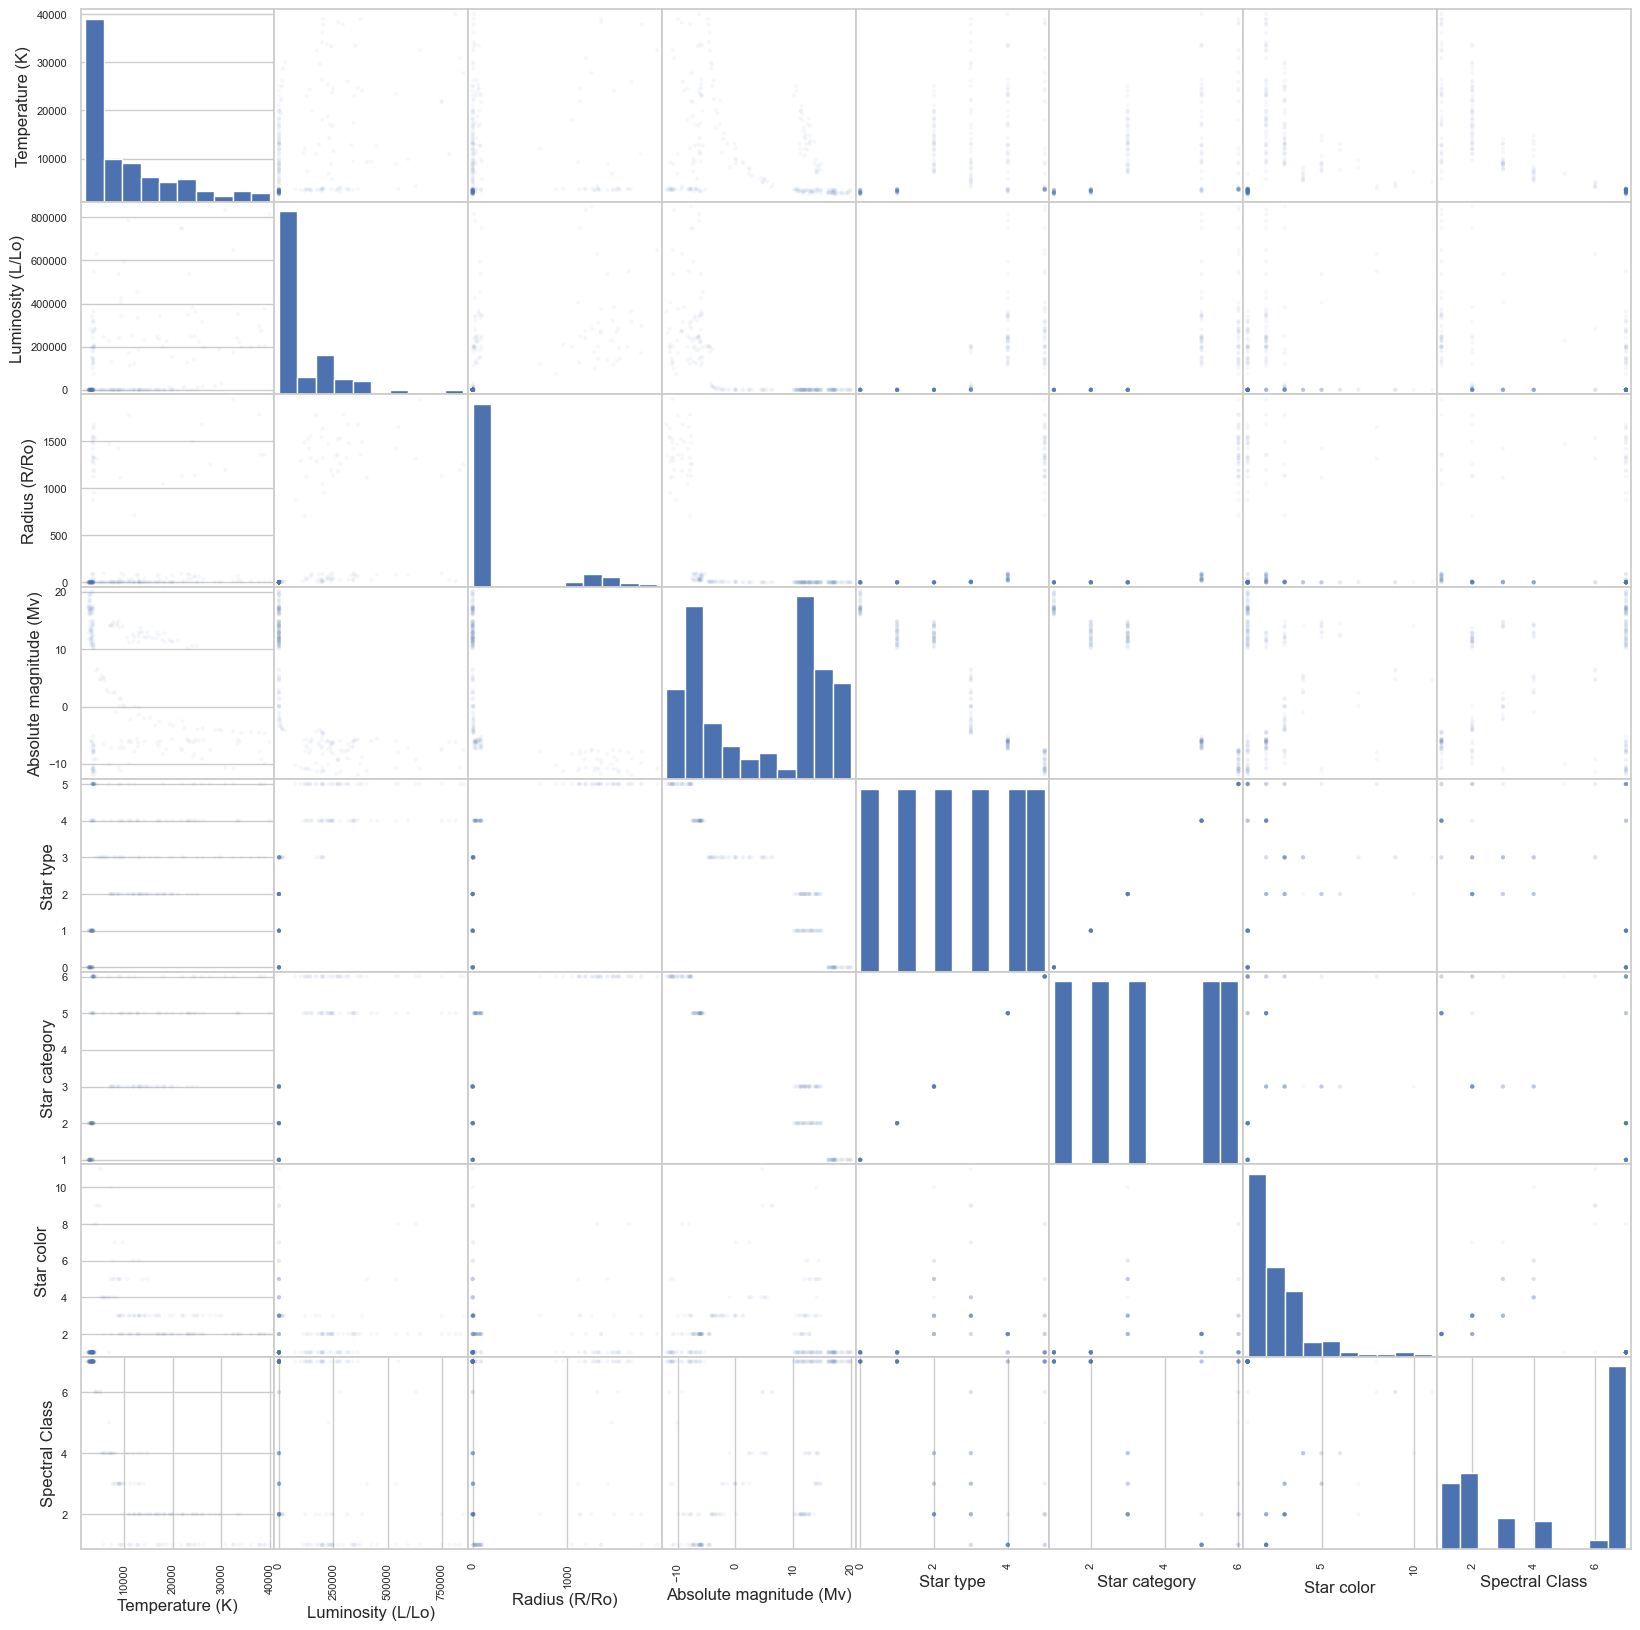

In [177]:
from pandas.plotting import scatter_matrix
scatter_matrix(star[staars], alpha=0.05, figsize=(20, 20));

In [191]:
# Средняя температура
star.groupby('Star type')['Temperature (K)'].mean()

Star type
0     2997.950
1     3283.825
2    13931.450
3    16018.000
4    15347.850
5    11405.700
Name: Temperature (K), dtype: float64

## Форматирование датасета для обучения модели данных